In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import scipy.stats as stats 
from sklearn.linear_model import LinearRegression 
import wrangle

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error

In [2]:
df = wrangle.acquire_zillow()

Acquiring data from SQL database


In [3]:
df = wrangle.prep_zillow(df)

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
52440,3,2.0,1762,6317,522000,1955,LA
52439,3,1.0,1032,876,49546,1954,LA
52438,4,2.0,1612,1107,67205,1964,Ventura
52437,2,2.0,1286,4478,354621,1940,LA
52320,3,1.0,1468,6498,523019,1949,LA


In [5]:
df.shape

(38900, 7)

In [6]:
np.random.seed(0)

n = df.shape[0]
x = np.random.randn(n)
# y = beta0 + beta1*x + error
y = x*10 + np.random.randn(n)*2

In [7]:
demo_df = pd.DataFrame([x,y]).T

In [8]:
demo_df.columns = ['x', 'y']
demo_df.head()

,x,y
0,1.764052,19.546775
1,0.400157,4.419280
2,0.978738,10.061192
3,2.240893,25.189647
4,1.867558,19.590636


Is the zillow set following a linear model or not?

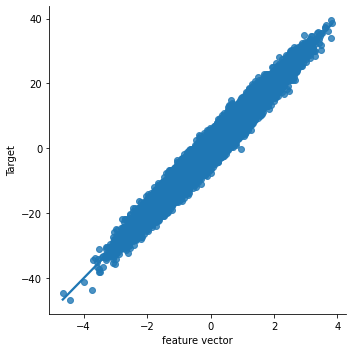

In [9]:
sns.lmplot(x='x', y='y', data=demo_df, order=1)
plt.ylabel('Target')
plt.xlabel('feature vector')
plt.show()

In [10]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxamount', 'taxvaluedollarcnt', 'yearbuilt', 'location'],
      dtype='object')

In [11]:
df[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet
52440,3,2.0,1762
52439,3,1.0,1032
52438,4,2.0,1612
52437,2,2.0,1286
52320,3,1.0,1468
...,...,...,...
50,2,1.0,1046
1,2,1.0,1465
5,2,1.0,738
3,4,3.0,2376


In [36]:
sampling = 1000
data = df.sample(sampling)

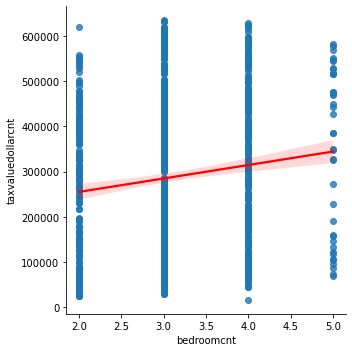

In [37]:
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)

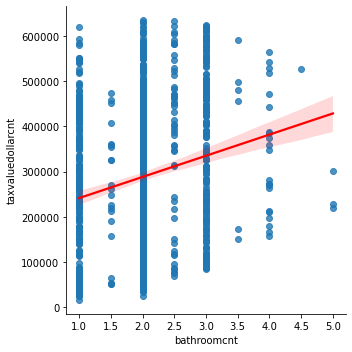

In [39]:
sns.lmplot(x='bathroomcnt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)

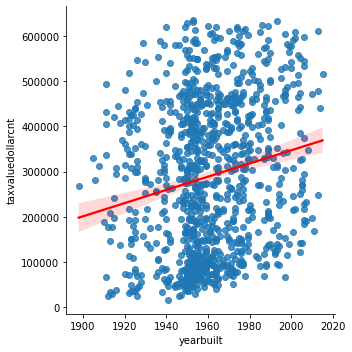

In [40]:
sns.lmplot(x='yearbuilt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)

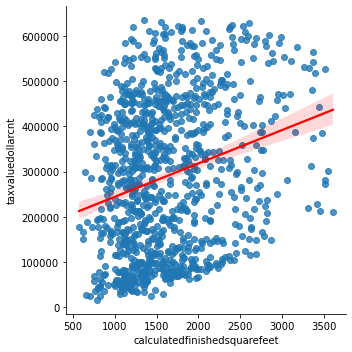

In [42]:
sns.lmplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)

Takeaway: 
- It is not following a linear relationship so data will need to be transformed

### Variable Transformation 

In [43]:
df['log_bedroomcnt'] = np.log(df['bedroomcnt'])

In [45]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location,log_bedroomcnt
52440,3,2.0,1762,6317,522000,1955,LA,1.098612
52439,3,1.0,1032,876,49546,1954,LA,1.098612
52438,4,2.0,1612,1107,67205,1964,Ventura,1.386294
52437,2,2.0,1286,4478,354621,1940,LA,0.693147
52320,3,1.0,1468,6498,523019,1949,LA,1.098612


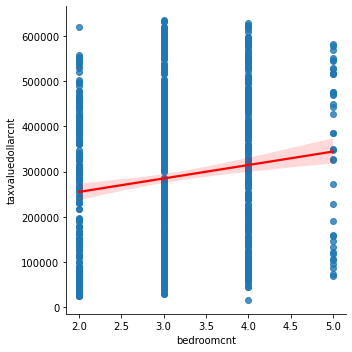

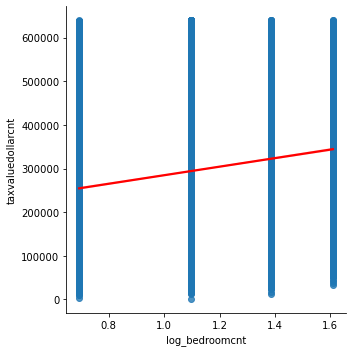

In [47]:
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)
sns.lmplot(x='log_bedroomcnt', y='taxvaluedollarcnt', data = df, line_kws={'color': 'red'}, order=1)

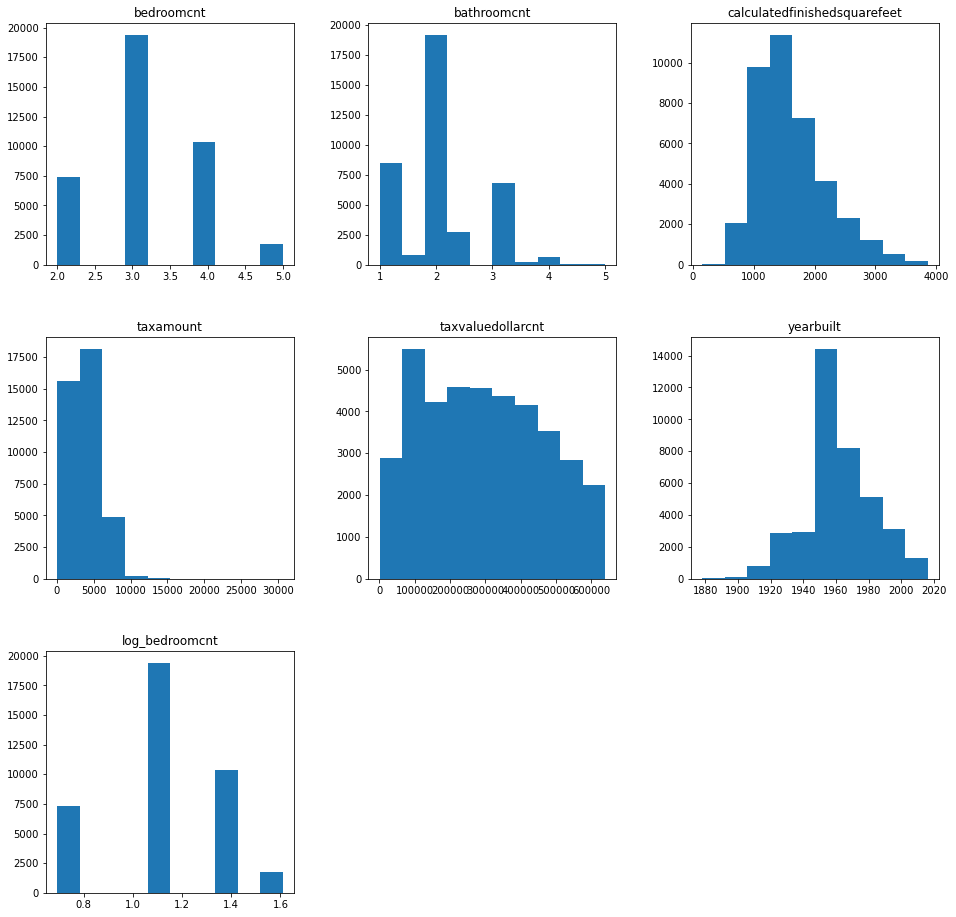

In [50]:
df.hist(figsize=(16,16), grid=False)
plt.show()

In [55]:
from sklearn.preprocessing import PowerTransformer

In [52]:
transformer = PowerTransformer(method='box-cox', standardize=False)

In [ ]:
#df['box_bedroomcnt'] = transformer.fit_transform(df['bedroomcnt'])

In [56]:
transformer = PowerTransformer(method='yeo-johnson'; standardize=False)

In [58]:
transformer = PowerTransformer(method='yeo-johnson'; standardize=False)
df['yj_bedroomcnt'] = transformer.fit_transform(df[['bedroomcnt']])

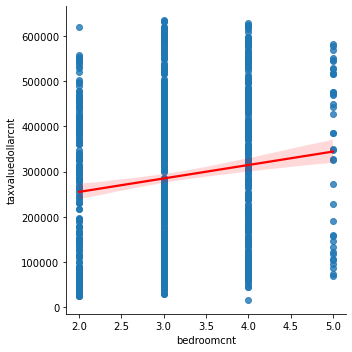

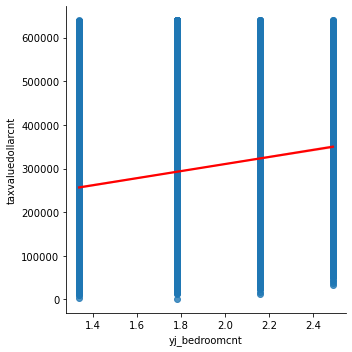

In [59]:
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)
sns.lmplot(x='yj_bedroomcnt', y='taxvaluedollarcnt', data = df, line_kws={'color': 'red'}, order=1)

In [ ]:
df['log_bedroomcnt'] = np.log(df['bedroomcnt'])
sns.lmplot(x='bedroomcnt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)
sns.lmplot(x='log_bedroomcnt', y='taxvaluedollarcnt', data = df, line_kws={'color': 'red'}, order=1)

In [ ]:
df['log_bathroomcnt'] = np.log(df['bathroomcnt'])
sns.lmplot(x='bathroomcnt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)
sns.lmplot(x='log_bathroomcnt', y='taxvaluedollarcnt', data = df, line_kws={'color': 'red'}, order=1)

In [ ]:
df['log_yearbuilt'] = np.log(df['yearbuilt'])
sns.lmplot(x='yearbuilt', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)
sns.lmplot(x='log_yearbuilt', y='taxvaluedollarcnt', data = df, line_kws={'color': 'red'}, order=1)

In [ ]:
df['log_calculatedfinishedsquarefeet'] = np.log(df['calculatedfinishedsquarefeet'])
sns.lmplot(x='calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data = data, line_kws={'color': 'red'}, order=1)
sns.lmplot(x='log_calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data = df, line_kws={'color': 'red'}, order=1)

### Check Variables Normality 

In [ ]:
#cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']

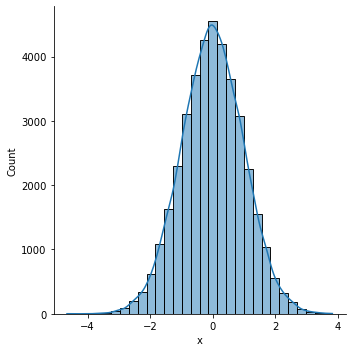

In [60]:
sns.displot(demo_df['x'], bins=30, kde=True)

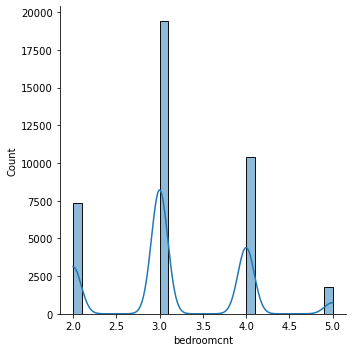

In [61]:
sns.displot(df['bedroomcnt'], bins=30, kde=True)

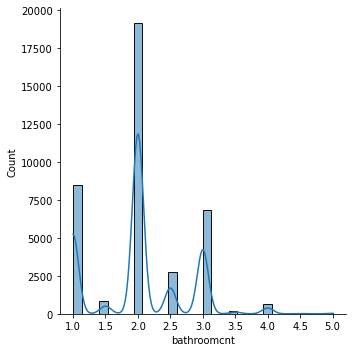

In [62]:
sns.displot(df['bathroomcnt'], bins=30, kde=True)

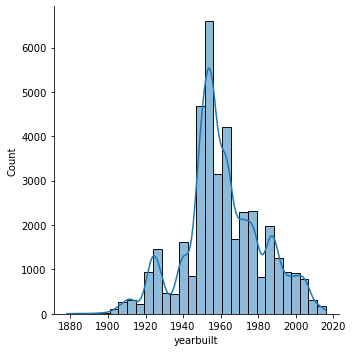

In [64]:
sns.displot(df['yearbuilt'], bins=30, kde=True)

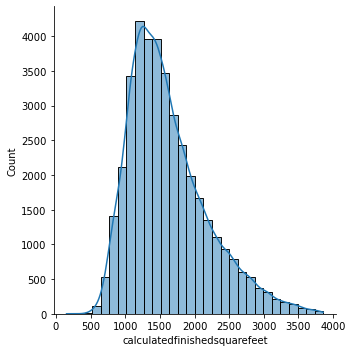

In [66]:
sns.displot(df['calculatedfinishedsquarefeet'], bins=30, kde=True)

### Check with QQ Plot 

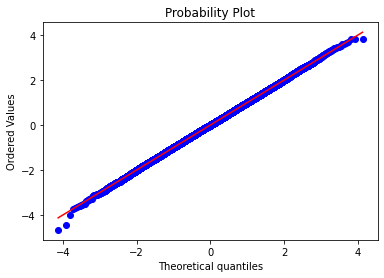

In [67]:
stats.probplot(demo_df['x'], dist='norm', plot=plt)
plt.show()

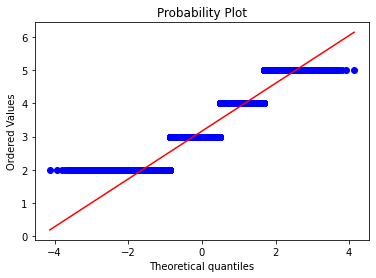

In [68]:
stats.probplot(df['bedroomcnt'], dist='norm', plot=plt)
plt.show()

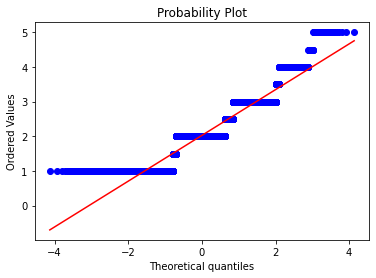

In [69]:
stats.probplot(df['bathroomcnt'], dist='norm', plot=plt)
plt.show()

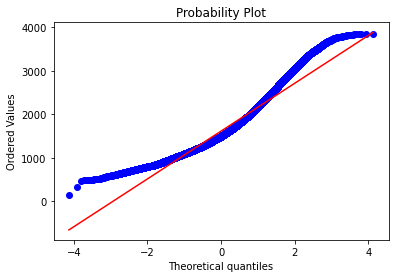

In [70]:
stats.probplot(df['calculatedfinishedsquarefeet'], dist='norm', plot=plt)
plt.show()

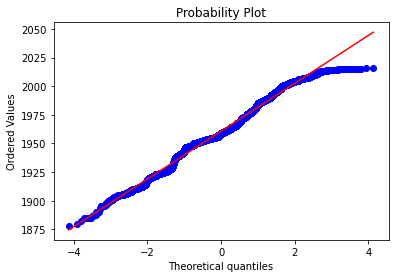

In [71]:
stats.probplot(df['yearbuilt'], dist='norm', plot=plt)
plt.show()

In [73]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df['yj_bedroomcnt'] = transformer.fit_transform(df[['bedroomcnt']])

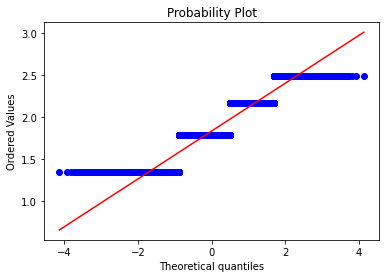

In [74]:
stats.probplot(df['yj_bedroomcnt'], dist='norm', plot=plt)
plt.show()

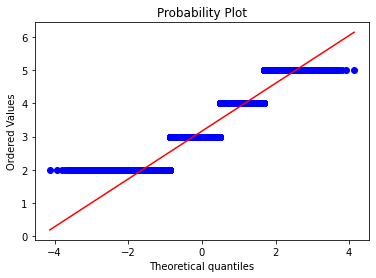

In [75]:
stats.probplot(df['bedroomcnt'], dist='norm', plot=plt)
plt.show()

### Homoscedasticity

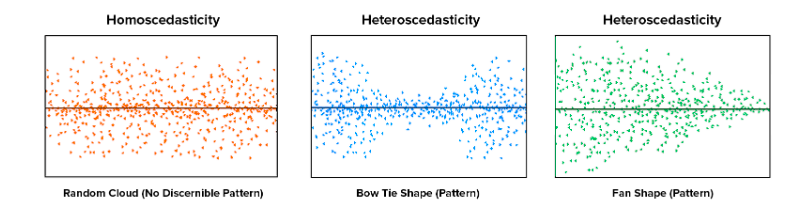

### Bedroom Count

No Transformer

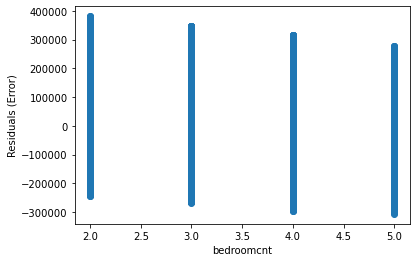

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df[['bedroomcnt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('bedroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [103]:
mean_squared_error(y_test, y_pred)

27558204860.96193

### yj is the best transformer for bedroom count 

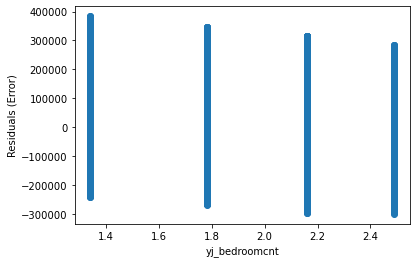

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df[['yj_bedroomcnt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_bedroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [105]:
mean_squared_error(y_test, y_pred)

27553727235.442127

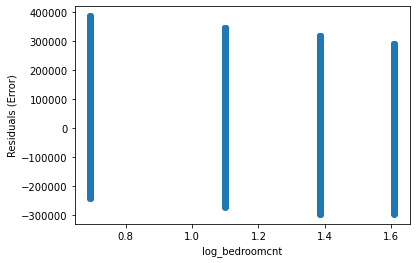

In [106]:
X_train, X_test, y_train, y_test = train_test_split(np.log(df[['bedroomcnt']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('log_bedroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [107]:
mean_squared_error(y_test, y_pred)

27556309775.556957

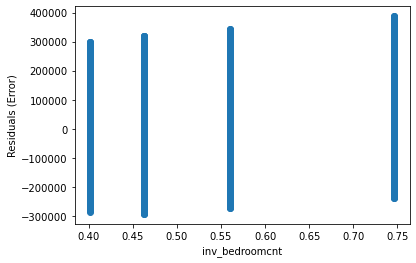

In [108]:
X_train, X_test, y_train, y_test = train_test_split(1/(df[['yj_bedroomcnt']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('inv_bedroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [109]:
mean_squared_error(y_test, y_pred)

27574380404.156002

### Bathroom Count 

No transformer beats the model without a transformer, YJ matches original accuracy

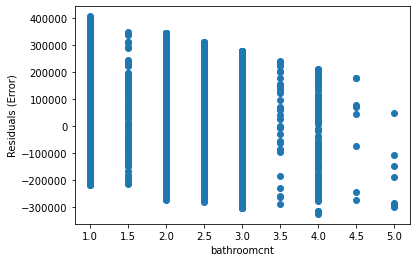

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df[['bathroomcnt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('bathroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()


In [111]:
mean_squared_error(y_test, y_pred)

26342363436.298782

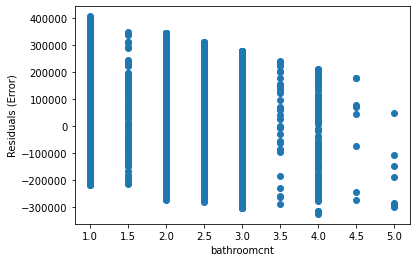

In [112]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df['yj_bathroomcnt'] = transformer.fit_transform(df[['bathroomcnt']])
X_train, X_test, y_train, y_test = train_test_split(df[['bathroomcnt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('bathroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [113]:
mean_squared_error(y_test, y_pred)

26342363436.298782

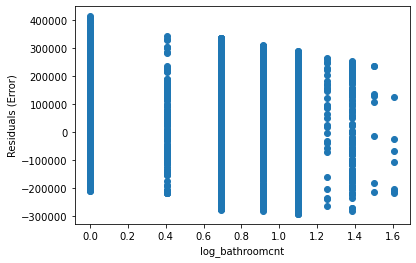

In [114]:
X_train, X_test, y_train, y_test = train_test_split(np.log(df[['bathroomcnt']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('log_bathroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [115]:
mean_squared_error(y_test, y_pred)

26406786522.880077

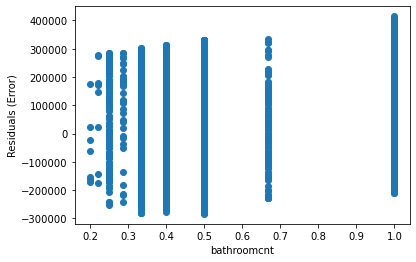

In [116]:
X_train, X_test, y_train, y_test = train_test_split(1/(df[['bathroomcnt']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('bathroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [117]:
mean_squared_error(y_test, y_pred)

26597631892.840584

### Year Built

No transformer beats the original

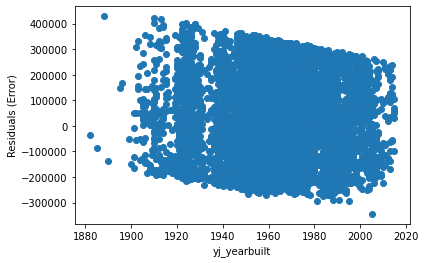

In [118]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df['yj_yearbuilt'] = transformer.fit_transform(df[['yearbuilt']])
X_train, X_test, y_train, y_test = train_test_split(df[['yearbuilt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_yearbuilt')
plt.ylabel('Residuals (Error)')
plt.show()

In [119]:
mean_squared_error(y_test, y_pred)

26923166051.61125

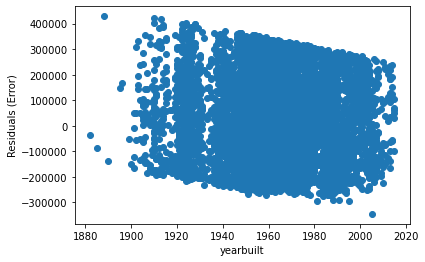

In [120]:
X_train, X_test, y_train, y_test = train_test_split(df[['yearbuilt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yearbuilt')
plt.ylabel('Residuals (Error)')
plt.show()

In [121]:
mean_squared_error(y_test, y_pred)

26923166051.61125

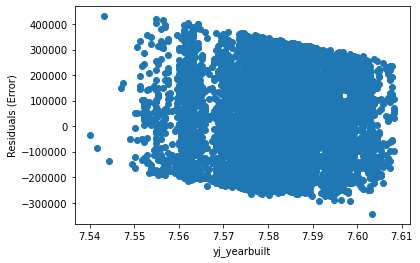

In [122]:
X_train, X_test, y_train, y_test = train_test_split(np.log(df[['yearbuilt']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_yearbuilt')
plt.ylabel('Residuals (Error)')
plt.show()

In [123]:
mean_squared_error(y_test, y_pred)

26928916248.44443

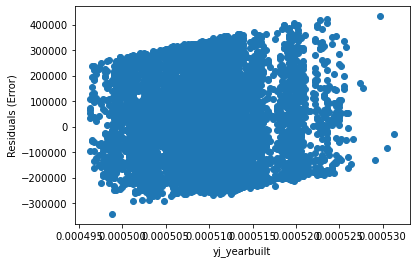

In [124]:
X_train, X_test, y_train, y_test = train_test_split(1/(df[['yearbuilt']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_yearbuilt')
plt.ylabel('Residuals (Error)')
plt.show()

In [125]:
mean_squared_error(y_test, y_pred)

26934824870.906933

### Square Feet

### No Model Beats the original 

In [126]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
df['yj_squarefeet'] = transformer.fit_transform(df[['calculatedfinishedsquarefeet']])

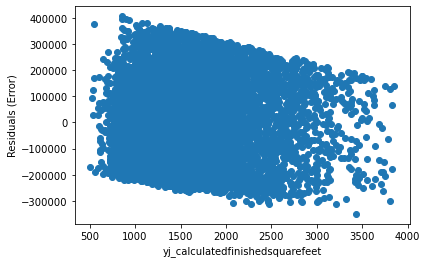

In [127]:

X_train, X_test, y_train, y_test = train_test_split(df[['calculatedfinishedsquarefeet']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('yj_calculatedfinishedsquarefeet')
plt.ylabel('Residuals (Error)')
plt.show()

In [128]:
mean_squared_error(y_test, y_pred)

26190278086.343277

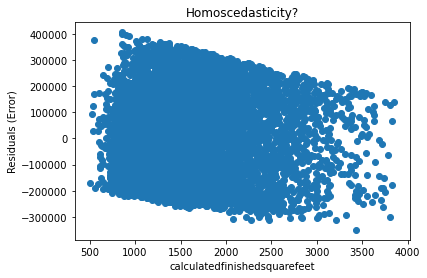

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df[['calculatedfinishedsquarefeet']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residuals (Error)')
plt.title('Homoscedasticity?')
plt.show()

In [130]:
mean_squared_error(y_test, y_pred)

26190278086.343277

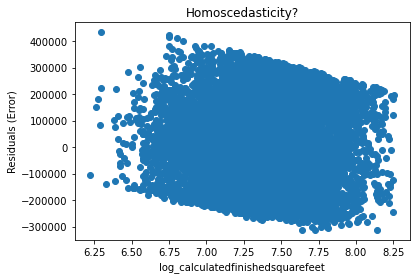

In [131]:
X_train, X_test, y_train, y_test = train_test_split(np.log(df[['calculatedfinishedsquarefeet']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('log_calculatedfinishedsquarefeet')
plt.ylabel('Residuals (Error)')
plt.title('Homoscedasticity?')
plt.show()

In [132]:
mean_squared_error(y_test, y_pred)

26207627970.08237

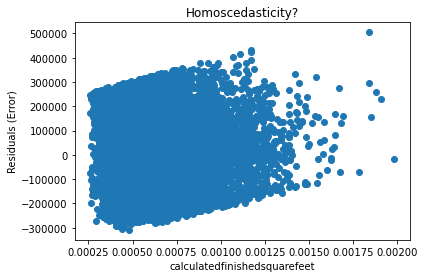

In [133]:
X_train, X_test, y_train, y_test = train_test_split(1/(df[['calculatedfinishedsquarefeet']]), df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('Residuals (Error)')
plt.title('Homoscedasticity?')
plt.show()

In [134]:
mean_squared_error(y_test, y_pred)

26394598425.746006

### Multicollinearity Must be Less than 0.6

In [135]:
corrmat = df.corr()
corrmat

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,log_bedroomcnt,yj_bedroomcnt,yj_bathroomcnt,yj_yearbuilt,yj_squarefeet
bedroomcnt,1.000000,0.578244,0.606046,0.165771,0.149100,0.358703,0.988500,0.997184,0.580835,0.358898,0.627102
bathroomcnt,0.578244,1.000000,0.762885,0.283950,0.266982,0.550146,0.576988,0.579251,0.996799,0.549922,0.774089
calculatedfinishedsquarefeet,0.606046,0.762885,1.000000,0.299405,0.279579,0.461339,0.590983,0.600351,0.752148,0.460594,0.971098
taxamount,0.165771,0.283950,0.299405,1.000000,0.930283,0.254385,0.163934,0.165362,0.280436,0.253649,0.293205
taxvaluedollarcnt,0.149100,0.266982,0.279579,0.930283,1.000000,0.214095,0.147912,0.148988,0.265745,0.213737,0.279383
yearbuilt,0.358703,0.550146,0.461339,0.254385,0.214095,1.000000,0.373977,0.367388,0.559258,0.999986,0.478424
log_bedroomcnt,0.988500,0.576988,0.590983,0.163934,0.147912,0.373977,1.000000,0.997040,0.583452,0.374280,0.625280
yj_bedroomcnt,0.997184,0.579251,0.600351,0.165362,0.148988,0.367388,0.997040,1.000000,0.583779,0.367636,0.628045
yj_bathroomcnt,0.580835,0.996799,0.752148,0.280436,0.265745,0.559258,0.583452,0.583779,1.000000,0.559132,0.773906
yj_yearbuilt,0.358898,0.549922,0.460594,0.253649,0.213737,0.999986,0.374280,0.367636,0.559132,1.000000,0.477921


Takeaway: 
- Multicollinearity must be less than 0.6 
- bathroom count and calculated square feet are too closely correlated 

In [138]:
from sklearn.preprocessing import StandardScaler

In [140]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxamount', 'taxvaluedollarcnt', 'yearbuilt', 'location',
       'log_bedroomcnt', 'yj_bedroomcnt', 'yj_bathroomcnt', 'yj_yearbuilt',
       'yj_squarefeet'],
      dtype='object')

In [ ]:
scaler = StandardScaler()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['bedroomcnt']], df['taxvaluedollarcnt'], test_size= 0.2,random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

error = y_test - y_pred

plt.scatter(x=X_test, y=error)
plt.xlabel('bedroomcnt')
plt.ylabel('Residuals (Error)')
plt.show()

In [141]:
pip install yellowbrick

     |████████████████████████████████| 274 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.6 MB 15.1 MB/s eta 0:00:01     |████████████████                | 4.3 MB 15.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
LA County Non linear model 

In [ ]:
#Create my X and y variables for quick reference 
X = train_LA_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
y = train_LA_y['taxvaluedollarcnt'].copy()

In [ ]:
#Create A and B variables for quick reference 
A = validate_LA_X[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt']].copy()
B = validate_LA_y['taxvaluedollarcnt'].copy()

In [ ]:
#Create a baseline 
baseline = train_LA_y.taxvaluedollarcnt.mean()
baseline

In [ ]:
#Create dataframe with target variable and my baseline 
LA_df = pd.DataFrame(y)

In [ ]:
#Create dataframe with validate target variable 
LA_validate_df = pd.DataFrame(B)

In [ ]:
#add a column for baseline
LA_df['baseline'] = baseline

In [ ]:
#Set the linear regression model 
lm = LinearRegression()

In [ ]:
#fit the model 
lm.fit(train_LA_X, train_LA_y)

In [ ]:
#print the coefficients 
lm.coef_[0]

In [ ]:
#Create a dataframe with my coefficients and x columns 
cdf = pd.DataFrame(X.columns, lm.coef_[0], columns=['Coeff'])